In [2]:
#pip install keras 

In [1]:
#pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Bidirectional   

In [2]:
df=pd.read_excel("dse13-21.xlsx")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1926,2013-02-05,4191.50,4191.50,4191.50,4191.50,-,0.0065
1927,2013-02-04,4164.62,4164.62,4164.62,4164.62,-,0.0002
1928,2013-02-03,4163.82,4163.82,4163.82,4163.82,-,0.0067
1929,2013-01-31,4136.30,4136.30,4136.30,4136.30,-,0.0023
1930,2013-01-30,4126.75,4126.75,4126.75,4126.75,-,-0.0067


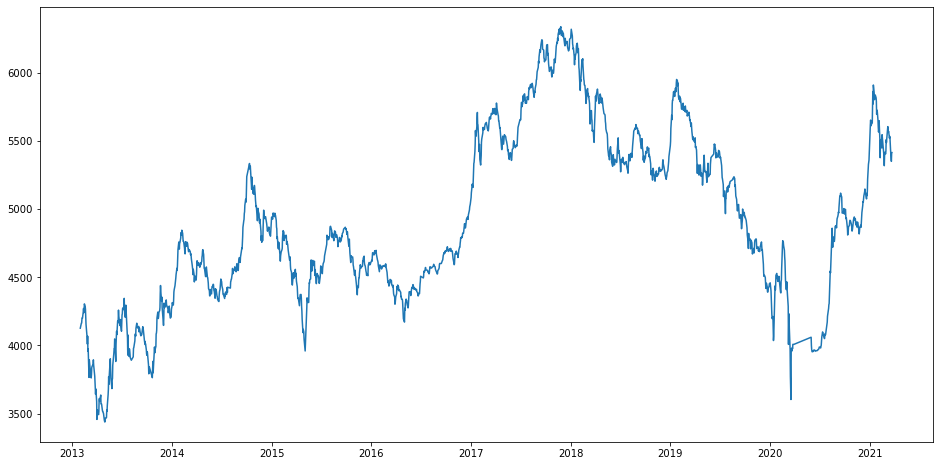

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Price"],label='Close Price history')

In [4]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Price'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Price"][i]=data["Price"][i]
new_dataset

,Date,Price
0,2013-01-30 00:00:00,4126.75
1,2013-01-31 00:00:00,4136.3
2,2013-02-03 00:00:00,4163.82
3,2013-02-04 00:00:00,4164.62
4,2013-02-05 00:00:00,4191.5
...,...,...
1926,2021-03-16 00:00:00,5516.4
1927,2021-03-18 00:00:00,5434.69
1928,2021-03-21 00:00:00,5349.77
1929,2021-03-22 00:00:00,5412.19


## show error if more than one times run

In [5]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:1500,:]
valid_data=final_dataset[1500:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [6]:
lstm_model=Sequential()
lstm_model.add( LSTM(50, activation='relu', return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(50))
#lstm_model.add(Dropout(0.1))
#lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [7]:
# COMPILE THE MODEL

lstm_model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
#  FIT THE MODEL
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

1440/1440 - 39s - loss: 8.8916e-04


In [19]:
# Take a sample of a dataset to make stock price predictions using the LSTM model

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
closing_price

array([[5307.406 ],
       [5296.648 ],
       [5308.7144],
       [5329.8213],
       [5333.5684],
       [5322.665 ],
       [5313.9346],
       [5300.3135],
       [5270.6367],
       [5247.635 ],
       [5255.316 ],
       [5303.678 ],
       [5346.452 ],
       [5361.9614],
       [5355.063 ],
       [5338.9727],
       [5320.9263],
       [5298.728 ],
       [5271.7856],
       [5243.4966],
       [5231.0405],
       [5257.407 ],
       [5280.728 ],
       [5287.227 ],
       [5288.0957],
       [5285.8403],
       [5283.195 ],
       [5280.876 ],
       [5299.1187],
       [5329.2754],
       [5363.8677],
       [5398.393 ],
       [5431.276 ],
       [5466.002 ],
       [5489.957 ],
       [5502.5938],
       [5493.246 ],
       [5459.5034],
       [5428.9697],
       [5410.4756],
       [5398.426 ],
       [5390.134 ],
       [5387.5796],
       [5387.8794],
       [5398.5967],
       [5417.688 ],
       [5434.3374],
       [5436.0103],
       [5426.7983],
       [5416.968 ],


In [20]:
# Save the LSTM model
lstm_model.save("saved_model.h3")

INFO:tensorflow:Assets written to: saved_model.h3\assets


INFO:tensorflow:Assets written to: saved_model.h3\assets


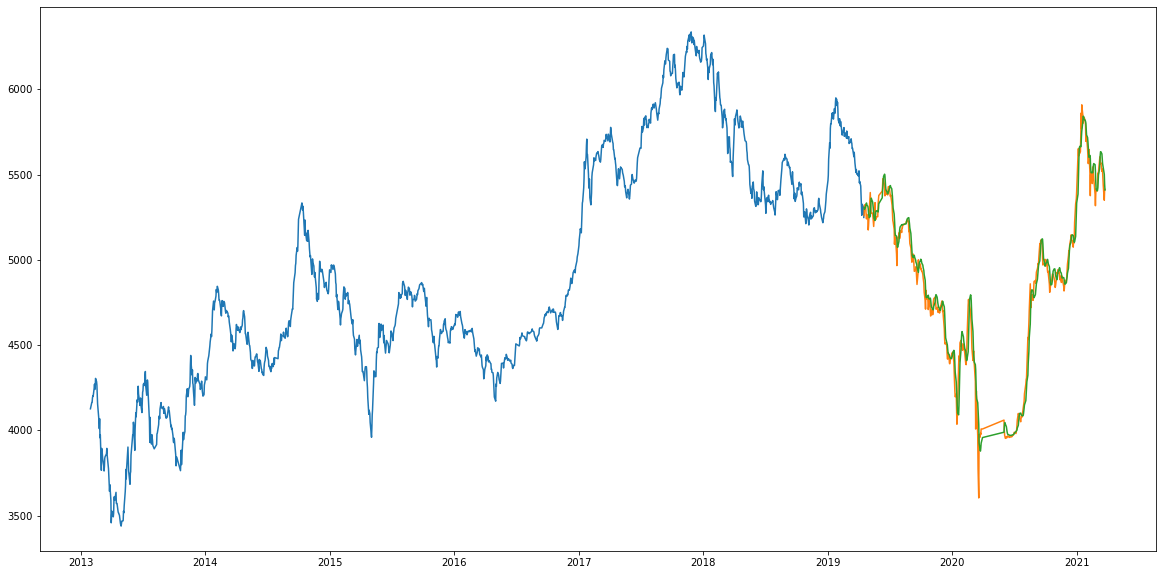

In [21]:
# Visualize the predicted stock costs with actual stock costs
train_data=new_dataset.iloc[:1500]
valid_data=new_dataset.iloc[1500:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Price"])
plt.plot(valid_data[['Price',"Predictions"]])

In [15]:
# You can observe that LSTM has predicted stocks almost similar 
# to actual stocks.

In [22]:
train_data

,Price
Date,
2013-01-30,4126.75
2013-01-31,4136.3
2013-02-03,4163.82
2013-02-04,4164.62
2013-02-05,4191.5
...,...
2019-04-09,5318.75
2019-04-10,5261.6
2019-04-11,5326.39


In [23]:
valid_data

,Price,Predictions
Date,,
2019-04-17,5259.41,5307.405762
2019-04-18,5321.41,5296.647949
2019-04-21,5323.73,5308.714355
2019-04-23,5260.85,5329.821289
2019-04-24,5240.36,5333.568359
...,...,...
2021-03-16,5516.4,5564.615723
2021-03-18,5434.69,5540.488281
2021-03-21,5349.77,5501.709473


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_data['Price'], valid_data['Predictions']))
rms

81.52220709937775